In [1]:
from collections import deque, defaultdict
import sys, math, random
import numpy as np
import gym

In [2]:
def interact(env, agent, num_episodes=100000, window=100):
    avg_rewards = list()
    best_avg_reward = -math.inf
    samp_rewards = deque(maxlen=window)

    for i_episode in range(1, num_episodes+1):
        state = env.reset()
        samp_reward = 0
        while True:
            action = agent.select_action(state, i_episode)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            samp_reward += reward
            state = next_state
            if done:
                samp_rewards.append(samp_reward)
                break
        if (i_episode >= 100):
            avg_reward = np.mean(samp_rewards)
            avg_rewards.append(avg_reward)
            if avg_reward > best_avg_reward:
                best_avg_reward = avg_reward
        print("\rEpisode {} , epsilon = {:.5f}, alpha = {:.5f}, gamma = {:.5f}|| Best average reward {:.3f}".format(
            i_episode, agent.epsilon, agent.alpha, agent.gamma, best_avg_reward), end="")
        sys.stdout.flush()
        
        # check if task is solved (according to OpenAI Gym)
        if best_avg_reward >= 9.7:
            print('\nEnvironment solved in {} episodes.'.format(i_episode), end="")
            break
        if i_episode == num_episodes: print('\n')
    return avg_rewards, best_avg_reward

In [3]:
class Agent:
    def __init__(self, nA=6, eps_range=[1e-3, 1e-6], alpha_range=[1e-2, 1e-3], gamma_range=[0.99, 0.8], decay_steps=20000):
        self.nA = nA
        self.Q = defaultdict(lambda: np.zeros(self.nA))
        self.decay_steps = decay_steps
        self.epsilons = np.linspace(eps_range[0], eps_range[1], self.decay_steps)
        self.alphas = np.linspace(alpha_range[0], alpha_range[1], self.decay_steps)
        self.gammas = np.linspace(gamma_range[0], gamma_range[1], self.decay_steps)
    def select_action(self, state, i_episode):
        self.epsilon = self.epsilons[min(i_episode, self.decay_steps-1)]
        self.alpha = self.alphas[min(i_episode, self.decay_steps-1)]
        self.gamma = self.gammas[min(i_episode, self.decay_steps-1)]
        qmax_index = np.argmax(self.Q[state])
        if random.uniform(0, 1) > self.epsilon:
            return qmax_index
        else:
            return random.randrange(self.nA)
    def step(self, state, action, reward, next_state, done):
        new_value = (1 - self.alpha) * self.Q[state][action] + \
            self.alpha * (reward + self.gamma * np.max(self.Q[next_state]))
        self.Q[state][action] = new_value

In [4]:
env = gym.make('Taxi-v2')
agent = Agent()
avg_rewards, best_avg_reward = interact(env, agent)

Episode 100000 , epsilon = 0.00000, alpha = 0.00100, gamma = 0.80000|| Best average reward 9.5200



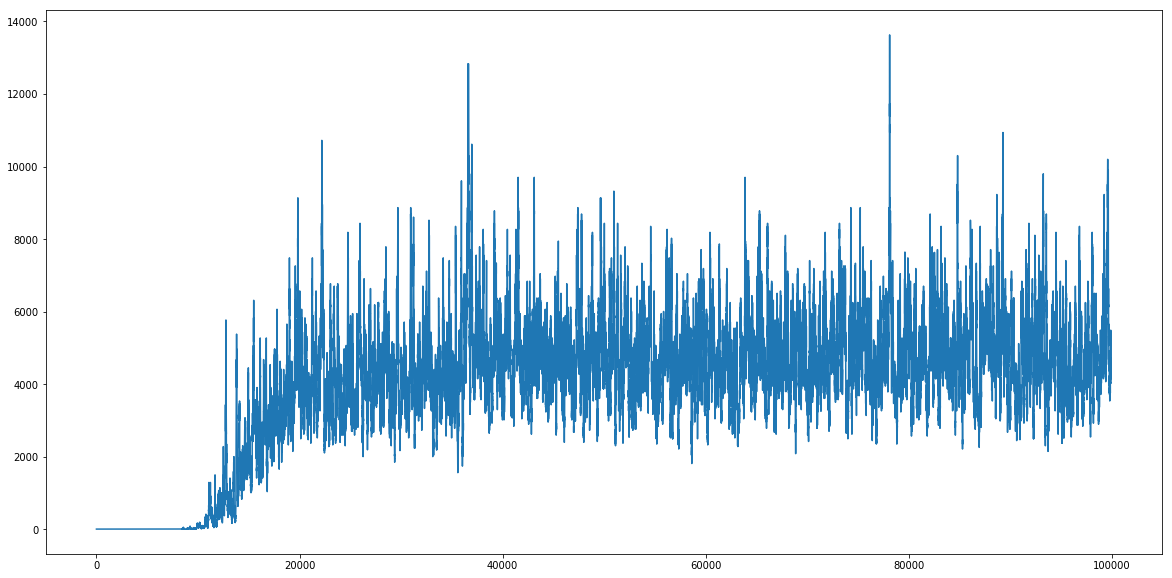

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.plot(np.exp(avg_rewards))
plt.show()